In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers

In [48]:
df = pd.read_csv("C:\datasets/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [49]:
# lyingRigh과 lyingBack을 lying으로 변환
df['activity'] = df['activity'].replace({'lyingRigh': 'lying', 'lyingBack': 'lying'})

In [50]:
print(df['activity'].value_counts())

lying                      960
sitting                    480
runningTreadmill           480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
walkingTreadmillIncline    480
standing                   480
walkingTreadmillFlat       480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
basketBall                 480
Name: activity, dtype: int64


In [51]:
df_filtered = df[df['activity'].isin(['sitting', 'lying'])]
df_filtered = df_filtered.drop('people', axis = 1)
df_filtered

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.42070,0.000242,...,9.195642e-05,0.009589,0.401254,-0.410987,-0.382210,-0.446050,9.935077e-05,0.009967,-0.597598,lying
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.43560,0.000156,...,7.375030e-05,0.008588,0.147180,-0.411248,-0.365810,-0.436760,8.659481e-05,0.009306,1.021454,lying
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.43130,0.000214,...,3.380089e-05,0.005814,0.032341,-0.409787,-0.379260,-0.434310,7.258946e-05,0.008520,0.431012,lying
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.45390,0.000257,...,9.044032e-05,0.009510,0.409508,-0.409101,-0.360740,-0.440870,1.127801e-04,0.010620,1.368666,lying


In [52]:
df_filtered['activity'].value_counts()

lying      960
sitting    480
Name: activity, dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df_filtered['activity'] = label_encoder.fit_transform(df_filtered['activity'])

df_filtered

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.42070,0.000242,...,9.195642e-05,0.009589,0.401254,-0.410987,-0.382210,-0.446050,9.935077e-05,0.009967,-0.597598,0
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.43560,0.000156,...,7.375030e-05,0.008588,0.147180,-0.411248,-0.365810,-0.436760,8.659481e-05,0.009306,1.021454,0
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.43130,0.000214,...,3.380089e-05,0.005814,0.032341,-0.409787,-0.379260,-0.434310,7.258946e-05,0.008520,0.431012,0
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.45390,0.000257,...,9.044032e-05,0.009510,0.409508,-0.409101,-0.360740,-0.440870,1.127801e-04,0.010620,1.368666,0


In [54]:
LABELS = ["Normal", "Abnormal"]

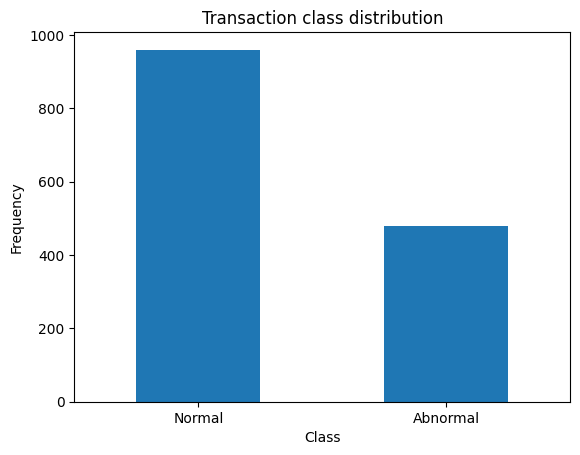

In [55]:
count_classes = df_filtered.value_counts(df['activity'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [56]:
df_noised = df_filtered.copy()

noise_factor = 0.5


# 선택한 열에 노이즈 추가
for column in df_noised.columns:
    if column != 'activity':
        df_noised[column] += noise_factor * np.random.normal(loc=0.0, scale=1.0, size=df_noised[column].shape)
    
df_noised

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.624679,8.485517,8.246922,0.336693,-0.076760,-0.384519,1.285897,0.645840,0.940982,0.543233,...,0.382802,0.764617,1.195097,0.823747,-0.538317,0.844541,-0.487694,-0.693999,0.000015,1
1,8.939781,8.109032,8.058815,0.289564,1.210839,0.461554,1.378026,1.435335,1.496190,0.129886,...,-1.295525,0.373762,0.286857,0.031951,-0.214249,0.578966,-0.090609,-0.440528,0.256604,1
2,8.579758,8.633139,7.331156,-0.527280,-0.309347,0.961356,1.829343,1.987678,0.654521,0.551376,...,0.022825,-0.736188,-0.301215,0.495653,0.454354,-0.549042,0.756248,-0.012807,0.459290,1
3,7.937776,7.233493,8.306691,-0.470786,0.593298,-0.252757,0.951628,1.262127,0.732179,0.126367,...,0.685192,-0.035250,-0.874662,1.458411,-0.816263,0.473804,0.270193,-0.085325,-0.591918,1
4,7.880627,6.826356,8.328154,-0.436610,-0.099621,2.599684,1.662651,1.608644,0.816725,-0.448341,...,-0.700048,-0.102133,-0.044248,0.058414,-0.029475,-0.168526,0.018245,-1.062604,0.610110,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,3.492143,2.759250,2.667796,0.846280,-0.522696,0.910750,-9.198721,-9.791973,-8.726859,-0.076941,...,-0.112651,-0.084291,0.189748,-1.410538,-0.547043,-0.924364,0.098817,0.128771,-0.925576,0
1916,2.251531,2.393874,2.790780,-0.354878,0.446697,-0.165446,-9.153430,-10.683851,-8.683855,0.343296,...,0.406739,0.719843,-0.248792,-0.661491,-1.492236,0.448404,-0.162720,0.628450,-0.138815,0
1917,2.725638,2.230110,3.353619,-0.164144,-0.122476,-0.335953,-8.972643,-9.026238,-9.295865,0.558570,...,-0.018473,0.816179,-0.696770,-0.629040,-0.664988,-1.227020,-0.530002,-0.473328,0.120260,0
1918,2.267678,2.370710,2.898706,0.955392,-0.272258,-0.054481,-9.105991,-10.155822,-9.825071,0.005516,...,0.556501,0.568209,0.158628,-0.829981,-0.549166,-0.524231,-0.083319,0.279416,1.413183,0


In [57]:
frauds = df_noised[df_noised.activity == 1]
normal = df_noised[df_noised.activity == 0]
frauds.shape

(480, 271)

In [58]:
normal.shape

(960, 271)

In [59]:
#노이즈 데이터와 기본 데이터

noise_data = df_noised.drop('activity', axis = 1)

pure_data = df_filtered.drop('activity', axis = 1)

In [60]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [61]:
# 노이즈 데이터와 퓨어 데이터 훈련

history = autoencoder.fit(noise_data, pure_data, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
6/6 [==============================] - 3s 102ms/step - loss: 5.6785 - val_loss: 5.6630
Epoch 2/50
6/6 [==============================] - 0s 25ms/step - loss: 5.6461 - val_loss: 5.6417
Epoch 3/50
6/6 [==============================] - 0s 24ms/step - loss: 5.5995 - val_loss: 5.6122
Epoch 4/50
6/6 [==============================] - 0s 24ms/step - loss: 5.5356 - val_loss: 5.5710
Epoch 5/50
6/6 [==============================] - 0s 24ms/step - loss: 5.4593 - val_loss: 5.5157
Epoch 6/50
6/6 [==============================] - 0s 23ms/step - loss: 5.3721 - val_loss: 5.4453
Epoch 7/50
6/6 [==============================] - 0s 24ms/step - loss: 5.2762 - val_loss: 5.3625
Epoch 8/50
6/6 [==============================] - 0s 23ms/step - loss: 5.1806 - val_loss: 5.2755
Epoch 9/50
6/6 [==============================] - 0s 24ms/step - loss: 5.0940 - val_loss: 5.1922
Epoch 10/50
6/6 [==============================] - 0s 24ms/step - loss: 5.0226 - val_loss: 5.1208
Epoch 11/50
6/6 [===========

In [62]:
from sklearn.model_selection import train_test_split

X_noise_train, X_noise_test = train_test_split(df_noised, test_size=0.2, random_state=20)

X_noise_train.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
251,7.295556,7.304008,6.552983,-0.038182,0.053187,-1.061545,0.283129,-0.730173,-0.648429,-0.126642,...,-1.529708,0.164024,-0.233927,0.294115,0.869089,-0.354448,0.249832,0.026172,-0.175505,1
1014,-3.920592,-4.283701,-4.793840,-0.499596,0.004284,-0.495237,-0.964156,-0.398575,-1.328353,0.821065,...,-0.646562,0.423474,0.185225,-1.079668,-0.410340,-0.178010,-0.452245,-0.359305,0.864592,0
1123,-2.961197,-3.262653,-3.887029,0.426491,-0.375947,0.112496,0.326505,-0.451075,0.004267,-0.418393,...,0.365932,-0.588417,0.458476,0.855309,0.761787,0.270289,0.151342,0.973829,-0.042889,0
255,6.258754,6.569273,7.101726,0.064985,0.328986,-0.441748,-0.339393,-0.585811,-0.773883,0.324825,...,-0.865841,-0.331324,-0.068531,0.439742,0.835714,0.578145,0.724746,0.246563,0.489912,1
1739,-1.518663,-0.523425,-0.499175,0.251226,-0.503201,-0.627821,-9.882821,-9.702692,-9.824361,0.286692,...,0.181720,0.689077,0.327386,-0.546709,0.212277,0.090868,-0.454171,-0.077521,-0.728147,0


In [63]:
X_noise_train = X_noise_train[X_noise_train.activity == 0]

y_noise_train = X_noise_train['activity']
y_noise_test = X_noise_test['activity']

X_noise_train = X_noise_train.drop(['activity'], axis=1)
X_noise_test = X_noise_test.drop(['activity'], axis=1)

X_noise_train

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
1014,-3.920592,-4.283701,-4.793840,-0.499596,0.004284,-0.495237,-0.964156,-0.398575,-1.328353,0.821065,...,1.311298,-0.646562,0.423474,0.185225,-1.079668,-0.410340,-0.178010,-0.452245,-0.359305,0.864592
1123,-2.961197,-3.262653,-3.887029,0.426491,-0.375947,0.112496,0.326505,-0.451075,0.004267,-0.418393,...,0.105019,0.365932,-0.588417,0.458476,0.855309,0.761787,0.270289,0.151342,0.973829,-0.042889
1739,-1.518663,-0.523425,-0.499175,0.251226,-0.503201,-0.627821,-9.882821,-9.702692,-9.824361,0.286692,...,-0.994080,0.181720,0.689077,0.327386,-0.546709,0.212277,0.090868,-0.454171,-0.077521,-0.728147
1621,1.407280,2.210084,-0.135473,-0.726424,-0.120186,-0.077321,-7.263319,-6.503200,-7.517617,-0.276086,...,-0.207967,-0.189226,0.422454,0.748420,-0.737231,0.113509,-0.625605,-0.675219,0.037527,0.349708
1126,-3.650978,-3.377188,-3.798339,-0.357380,-0.263926,-0.739623,-0.109439,0.218711,-0.084894,0.668329,...,1.323561,0.304677,0.550964,1.426928,1.138894,0.021567,0.297616,0.213380,-0.546857,1.462385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,3.184058,2.528730,1.817486,0.095671,0.517944,-0.080741,-9.960083,-8.883656,-8.946100,-0.317364,...,-0.596593,0.927223,0.060732,0.636738,-0.903876,-0.757174,-1.114980,-0.403626,0.446261,0.722092
1722,-0.550990,0.412603,-1.195064,0.163620,-0.503171,0.252857,-10.265003,-9.535823,-10.096795,-0.351542,...,-0.457011,-0.029086,-0.426186,0.264958,-0.993620,-0.575240,-0.426020,-0.367878,1.196404,-0.302869
1404,-2.296390,-1.614344,-2.790459,-0.462953,0.578205,-0.393511,-1.653760,-2.159180,-2.502423,-0.722164,...,0.100751,-0.532007,-1.433311,0.260659,-0.594192,-0.717727,0.160001,0.336723,0.561940,0.007201
1727,-0.300217,-1.007863,0.375859,-0.594303,0.276414,-0.112803,-9.957368,-9.751312,-9.095109,0.681271,...,-0.109695,-0.660230,0.691285,0.717649,-0.396947,-0.930416,-0.291980,0.132904,-0.001335,0.201847


In [64]:
denoised_X_test = autoencoder.predict(X_noise_test)

9/9 [==============================] - 0s 4ms/step


In [66]:
# denoised_X_test를 pandas DataFrame으로 변환
denoised_X_test = pd.DataFrame(denoised_X_test, columns=pure_data.columns) 
denoised_X_test

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
0,0.014284,0.005090,0.015746,0.000023,4.828671e-06,8.652116e-07,1.199030e-05,1.536748e-04,8.126342e-13,1.931358e-04,...,0.549281,1.195017e-04,2.293980e-06,0.000036,0.376474,4.285201e-02,8.503275e-04,0.000540,8.187456e-09,4.650580e-06
1,0.023561,0.017807,0.018260,0.000003,1.065321e-06,8.273059e-08,1.886808e-06,4.635813e-06,3.624376e-14,6.205299e-06,...,0.499809,6.264887e-07,4.349853e-08,0.000015,0.019325,1.920038e-04,1.740913e-06,0.000314,1.121410e-09,5.198661e-07
2,0.013651,0.006093,0.013145,0.000002,4.065742e-07,3.348687e-08,1.240536e-06,5.716794e-06,1.203280e-15,2.746085e-05,...,0.536914,8.801840e-06,1.071093e-07,0.000004,0.187759,1.914665e-02,2.145724e-04,0.000135,4.446024e-11,3.399142e-07
3,0.996847,0.998637,0.997784,0.000010,8.999309e-06,1.135511e-05,6.193185e-06,1.142515e-08,1.179758e-13,2.386045e-04,...,0.447332,3.982254e-05,1.328080e-04,0.000116,0.439637,4.482757e-01,4.079237e-01,0.000759,8.255755e-11,4.044116e-06
4,0.997204,0.998970,0.997692,0.000005,4.820031e-06,4.438530e-06,3.967304e-06,3.293595e-09,1.930627e-14,1.443868e-04,...,0.437154,1.652753e-05,4.865813e-05,0.000070,0.298425,3.581031e-01,3.023888e-01,0.000608,1.506263e-11,2.241584e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.999624,0.999968,0.996142,0.000528,1.069910e-03,1.434690e-04,2.183589e-05,4.554131e-08,2.838435e-08,4.455290e-06,...,0.065438,4.160930e-09,2.112868e-05,0.000624,0.000088,4.985233e-06,8.733857e-07,0.001531,2.478088e-06,1.201276e-05
284,0.974071,0.982650,0.971859,0.000005,2.955764e-06,2.600443e-06,4.708695e-06,2.185121e-08,2.185836e-14,1.427470e-04,...,0.447509,2.091166e-05,1.706373e-05,0.000061,0.296913,2.022920e-01,7.848307e-02,0.000581,3.510755e-11,2.507552e-06
285,0.974509,0.984294,0.965998,0.000004,2.916165e-06,2.300342e-06,5.743346e-06,1.744475e-08,1.971077e-14,1.380537e-04,...,0.414576,1.592975e-05,1.388170e-05,0.000068,0.225681,1.609216e-01,6.144783e-02,0.000657,2.461785e-11,2.925876e-06
286,0.992890,0.998533,0.991674,0.000592,2.691367e-04,3.700745e-05,5.885576e-07,1.013915e-06,9.714595e-09,3.329806e-07,...,0.199528,2.056026e-09,4.157119e-06,0.000072,0.000631,7.209362e-07,1.944503e-08,0.000186,8.607655e-05,3.753669e-07


In [68]:
history = autoencoder.fit(denoised_X_test, denoised_X_test, epochs=50, batch_size=256, shuffle=True, validation_split = 0.1)

Epoch 1/50
2/2 [==============================] - 2s 539ms/step - loss: 0.0564 - val_loss: 0.0537
Epoch 2/50
2/2 [==============================] - 0s 101ms/step - loss: 0.0542 - val_loss: 0.0496
Epoch 3/50
2/2 [==============================] - 0s 97ms/step - loss: 0.0503 - val_loss: 0.0446
Epoch 4/50
2/2 [==============================] - 0s 94ms/step - loss: 0.0455 - val_loss: 0.0392
Epoch 5/50
2/2 [==============================] - 0s 97ms/step - loss: 0.0403 - val_loss: 0.0339
Epoch 6/50
2/2 [==============================] - 0s 91ms/step - loss: 0.0352 - val_loss: 0.0292
Epoch 7/50
2/2 [==============================] - 0s 100ms/step - loss: 0.0307 - val_loss: 0.0252
Epoch 8/50
2/2 [==============================] - 0s 100ms/step - loss: 0.0267 - val_loss: 0.0218
Epoch 9/50
2/2 [==============================] - 0s 109ms/step - loss: 0.0233 - val_loss: 0.0191
Epoch 10/50
2/2 [==============================] - 0s 105ms/step - loss: 0.0204 - val_loss: 0.0169
Epoch 11/50
2/2 [======

In [69]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

9/9 [==============================] - 0s 4ms/step


,reconstruction_error,true_class
count,288.000000,288.000000
mean,4.763784,0.340278
std,0.221178,0.474627
min,4.508450,0.000000
25%,4.601441,0.000000
50%,4.695001,0.000000
75%,4.885843,1.000000
max,5.813463,1.000000


In [70]:
threshold = np.percentile(error_df['reconstruction_error'], 95)  # 95번째 백분위수

threshold

5.188239045325801

In [71]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(error_df['true_class'], error_df['reconstruction_error'])
optimal_idx = np.argmax(tpr - fpr)  # TPR - FPR이 최대가 되는 곳
optimal_threshold = thresholds[optimal_idx]

optimal_threshold

6.8134630540746945

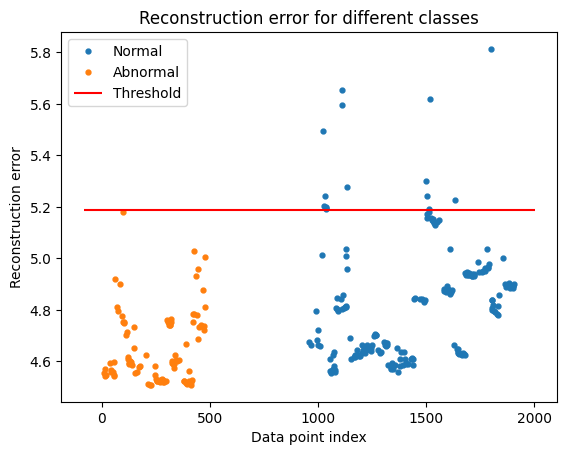

In [72]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

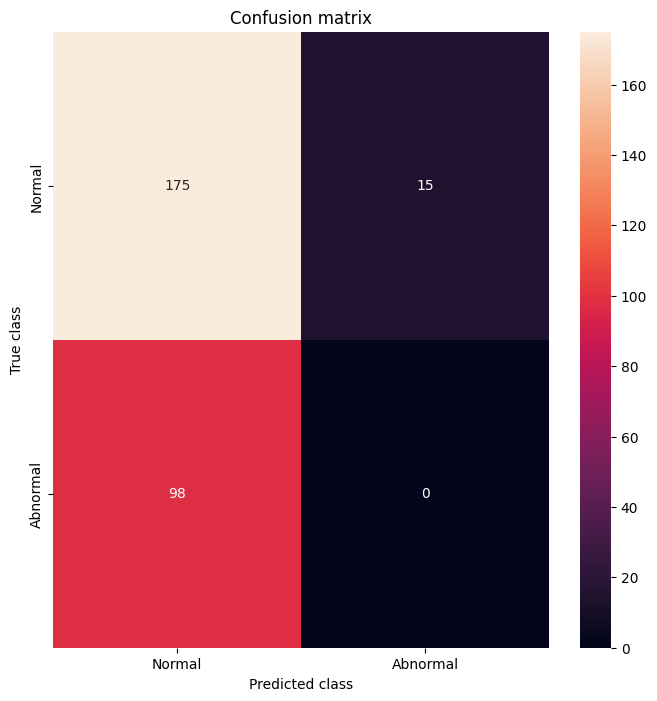

              precision    recall  f1-score   support

           0       0.64      0.92      0.76       190
           1       0.00      0.00      0.00        98

    accuracy                           0.61       288
   macro avg       0.32      0.46      0.38       288
weighted avg       0.42      0.61      0.50       288



In [73]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))